In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/ism_mask/large_rex_objects.fits'))
print(len(cat))

6178787


In [4]:
mask_keep = np.full(len(cat), False)
mask_keep |= (cat['PHOTSYS']=='S') & (cat['DEC']<32.375)
mask_keep |= (cat['PHOTSYS']=='N') & (cat['DEC']>32.375) & (cat['RA']>70) & (cat['RA']<310)
cat = cat[mask_keep]

In [5]:
maskbits = [1, 11, 12, 13]
mask_clean = np.ones(len(cat), dtype=bool)
for bit in maskbits:
    mask_clean &= (cat['MASKBITS'] & 2**bit)==0
print(np.sum(~mask_clean)/len(mask_clean))

0.1907165315100512


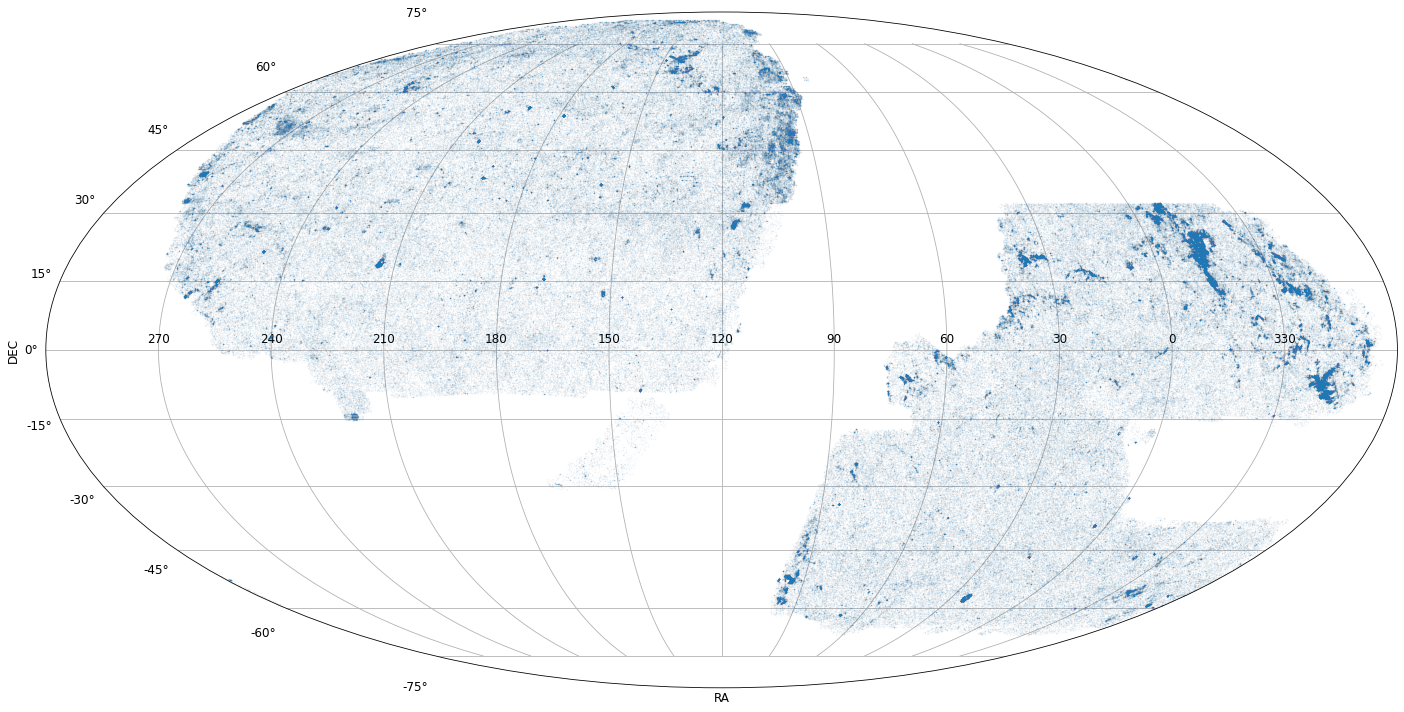

In [7]:
mask = np.full(len(cat), False)
idx = np.random.choice(len(cat), size=len(cat)//5, replace=False)
mask[idx] = True
mask &= mask_clean

# Scatter plot in Mollweide projection #----------------------------
ra, dec = cat['RA'][mask], cat['DEC'][mask]
rot = 120

x = np.remainder(ra+360-rot, 360) # shift ra values
x[x>180] -= 360    # scale conversion to [-180, 180]
x = -x
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+rot, 360)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(np.radians(x), np.radians(dec), '.', ms=0.03)
ax.set_xticklabels(tick_labels)
ax.set_title(None)
ax.title.set_fontsize(15)
ax.set_xlabel('RA')
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel('DEC')
ax.yaxis.label.set_fontsize(12)
ax.grid(True)
plt.tight_layout()
plt.show()

In [8]:
mask = mask_clean.copy()

# Scatter plot in Mollweide projection #----------------------------
ra, dec = cat['RA'][mask], cat['DEC'][mask]
rot = 120

x = np.remainder(ra+360-rot, 360) # shift ra values
x[x>180] -= 360    # scale conversion to [-180, 180]
x = -x
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+rot, 360)
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(np.radians(x), np.radians(dec), '.', ms=0.02)
ax.set_xticklabels(tick_labels)
ax.set_title(None)
ax.title.set_fontsize(15)
ax.set_xlabel('RA')
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel('DEC')
ax.yaxis.label.set_fontsize(12)
ax.grid(True)
plt.tight_layout()
plt.savefig('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/ism_mask/plots/large_rex_objects.png')
plt.close()

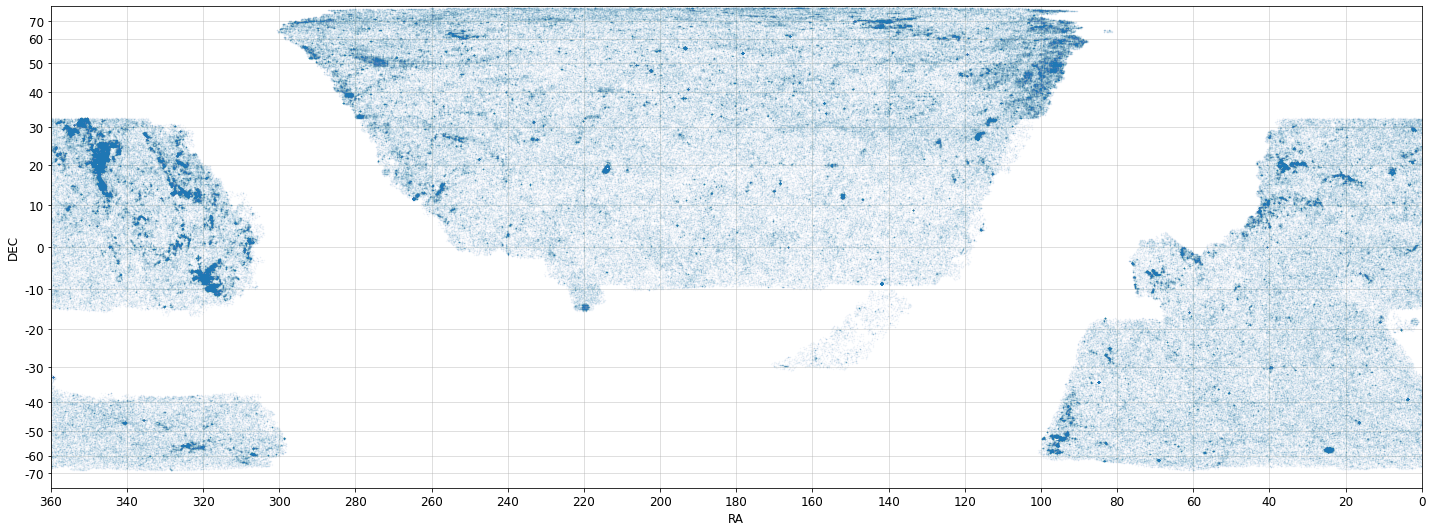

In [9]:
mask = np.full(len(cat), False)
idx = np.random.choice(len(cat), size=len(cat)//5, replace=False)
mask[idx] = True
mask &= mask_clean

fig, ax = plt.subplots(figsize=(20, 7.5))
ax.plot(cat['RA'][mask], np.sin(np.radians(cat['DEC'][mask])), '.', ms=1, alpha=0.05)
ax.axis([360, 0, -1., 1.])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 10))))
ax.set_yticklabels(np.arange(-70, 80, 10))
ax.set_xticks(np.arange(0, 361, 20))
ax.grid(alpha=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()